<a href="https://colab.research.google.com/github/SardorbekAI/Deep_Learning/blob/main/8_Raqamni_aniqlash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import fastai
import torch

In [ ]:
from fastai.vision.all import *

In [ ]:
#raqamlardan iborat data yuklandi
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [ ]:
#train uchun 3 va 7 raqamlarini rasmlari yuklab olindi
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [ ]:
#tekshirildi
img3_sample = threes[1]
img3 = Image.open(img3_sample)
img3

In [ ]:
#tekshirildi
img7_sample = sevens[1]
img7 = Image.open(img7_sample)
img7

In [ ]:
#np.array ning qisqartmasi. rasmning arraydagi ko'rinishi
array(img3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [ ]:
#tensor bilan DL da uchun. rasmning arraydagi ko'rinishi
tensor(img3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [ ]:
import pandas as pd

In [ ]:
#rasmni raqamli qiymatlarda ko'rish
img3_t = tensor(img3)
df = pd.DataFrame(img3_t[4:26, 4:22])
df.style.set_properties(**{'font-size' : '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [ ]:
#har bir rasm tensorfaylga o'tkazildi. DL uchun
three_tensors = [tensor(Image.open(i)) for i in threes]
seven_tensors = [tensor(Image.open(i)) for i in sevens]
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

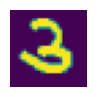

In [ ]:
#rasmni tekshirish
show_image(three_tensors[5])

In [ ]:
#rasmlarni bitta to'plamga yig'ildi va har bir rasmni qiymatini 0 va 1 oralig'iga olib
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_sevens.shape

torch.Size([6265, 28, 28])

In [ ]:
#0 linchi o'q bo'ylab o'rtachasi hisoblandi
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)
s_3 = mean3[1]

<Axes: >

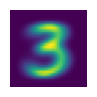

In [ ]:
#o'rtacha rasmni ko'rish
show_image(mean3)

In [ ]:
#xatolikni hisoblash. 3 ni 3 ga o'xshashi
mae = (s_3 - mean3).abs().mean()

rmse = ((s_3 - mean3) ** 2).mean().sqrt()

mae, rmse

(tensor(0.1415), tensor(0.2525))

In [ ]:
#xatolikni hisoblash. 3 ni 7 ga o'xshashi
mae = (s_3 - mean7).abs().mean()

rmse = ((s_3 - mean7) ** 2).mean().sqrt()

mae, rmse

(tensor(0.1145), tensor(0.2245))

In [ ]:
#list, array va tensor farqi
data = [[1, 2, 3], [4, 5, 6]]
arr = array(data)
tns = tensor(data)

In [ ]:
data

[[1, 2, 3], [4, 5, 6]]

In [ ]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
#test uchun validatsiya rasmi yuklandi
valid_3_tens = torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
#bitta rasm uchun o'rtacha xatolik
def mae(a, b):
  return (a - b).abs().mean((-1, -2))

mae(s_3, mean3)

tensor(0.1415)

In [ ]:
#hamma rasmlar uchun hatoliklar listi
valid_3_errors = mae(valid_3_tens, mean3)
valid_7_errors = mae(valid_7_tens, mean7)

valid_3_errors, valid_3_errors.shape

(tensor([0.1355, 0.1332, 0.1430,  ..., 0.1299, 0.1408, 0.1270]),
 torch.Size([1010]))

In [ ]:
#3 yoki 7 ni to'g'ri predict qilayotganini tekshirish
def is_3(x):
  return mae(x, mean3) < mae(x, mean7)

def is_7(x):
  return mae(x, mean7) < mae(x, mean3)

is_3(s_3), is_3(s_3).float()

(tensor(False), tensor(0.))

In [ ]:
#accuracy orqali tekshirish
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = is_7(valid_7_tens).float().mean()

accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s) / 2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))